In [2]:
#Imports
import pandas as pd
from spellchecker import SpellChecker
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
import numpy as np
import language_tool_python

In [3]:
#Read in data
data = pd.read_csv("data\mturk_experiment_2.csv",encoding = 'unicode_escape')

In [4]:
#Get spellcheck count
spell = SpellChecker()
tokeniser = TweetTokenizer()
mispelled_totals = []
mispelled_percent = []

for sentence in data["Sentence"]:
    tokenised = tokeniser.tokenize(sentence)
    misspelled = spell.unknown(tokenised)
    mispelled_totals.append(len(misspelled))

data["Spelling Errors"] = mispelled_totals    


In [5]:
#Get spellcheck percentage
data["Spelling Error Percentage"] = (data["Spelling Errors"] / data["Length in Words"]) * 100

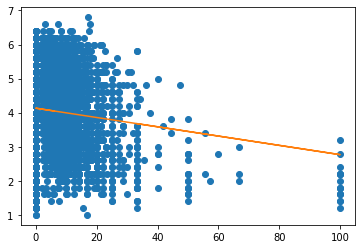

In [6]:
#Make plot
y = data["Formality"]
x = data["Spelling Error Percentage"]
x_ticks = np.arange(0,7.1,0.1)
y_ticks = np.arange(0,100.1,5)

m,b = np.polyfit(x,y,1)
plt.plot(x,y,'o')
plt.plot(x,m*x + b)


In [7]:
#0-0.3 indicates a negligble correlation 
correlation = data["Formality"].corr(data["Spelling Error Percentage"])
correlation

-0.1029006475722433

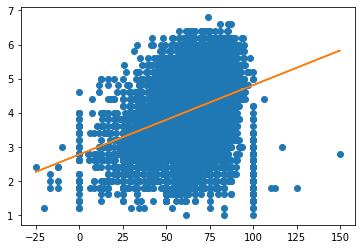

In [8]:
#Check correlation betweeen F-Score and formality

fscore_correlation = data["Formality"].corr(data["F-score"])
fscore_correlation

y = data["Formality"]
x = data["F-score"]
m,b = np.polyfit(x,y,1)
plt.plot(x,y,'o')
plt.plot(x,m*x + b)

In [16]:
#Test spellcheck and grammar correlation
tool = language_tool_python.LanguageTool('en-US')

s_g_errors = []

for sentence in data["Sentence"]:
    errors = tool.check(sentence)
    s_g_errors.append(len(errors))

data["S+G Percent"] = s_g_errors

-0.2725304491622841


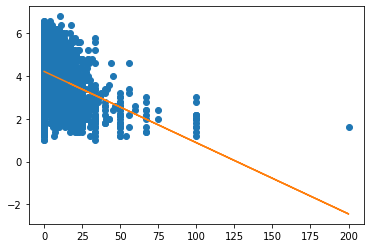

In [17]:
data["S+G Percent"] = (data["S+G Percent"] / data["Length in Words"]) * 100



s_g_correlation = data["Formality"].corr(data["S+G Percent"])
s_g_correlation

y = data["Formality"]
x = data["S+G Percent"]
m,b = np.polyfit(x,y,1)
plt.plot(x,y,'o')
plt.plot(x,m*x + b)

print(s_g_correlation)